In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
from hydra import compose, initialize
import os

# 加载项目层面的配置
with initialize(version_base=None, config_path="config"):
    cfg = compose(config_name="config")
os.chdir(cfg.root)

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

387

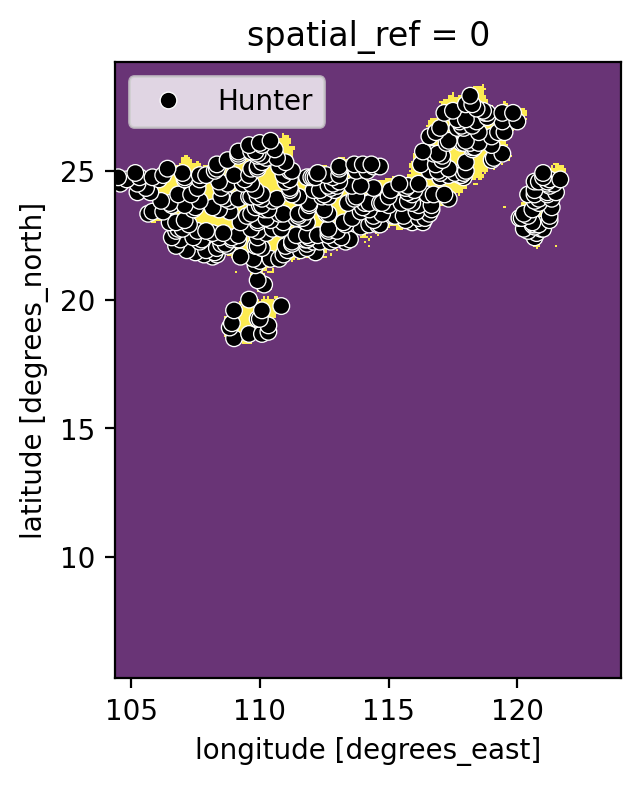

In [2]:
from src.core import Model
from src.api import Env


model = Model(cfg, nature_class=Env)
model.nature.setup()
model.nature.plot.show()
len(model.hunters)

In [6]:
from src.core import MyExperiment

exp = MyExperiment(model, nature_cls=Env)
exp.overrides

dict_keys([])

,bkp_farmer,bkp_rice,bkp_hunters,pre_farmer,pre_rice,pre_hunters,post_farmer,post_rice,post_hunters,job_id,repeat_id,env.init_hunters,env.lam_farmer
0,5,5,5,25.914286,0.0,634.628571,11.7,0.0,437.6,0,1,0.05,1
1,5,5,5,47.485714,0.0,743.428571,30.7,0.0,629.2,0,2,0.05,1
2,5,5,5,43.542857,0.0,471.000000,33.6,0.0,260.7,0,3,0.05,1
3,5,5,5,19.514286,0.0,812.000000,-0.6,0.0,609.6,0,4,0.05,1
4,5,5,5,35.942857,0.0,591.714286,-33.9,0.0,709.3,0,5,0.05,1


<Axes: xlabel='env.lam_farmer', ylabel='env.init_hunters'>

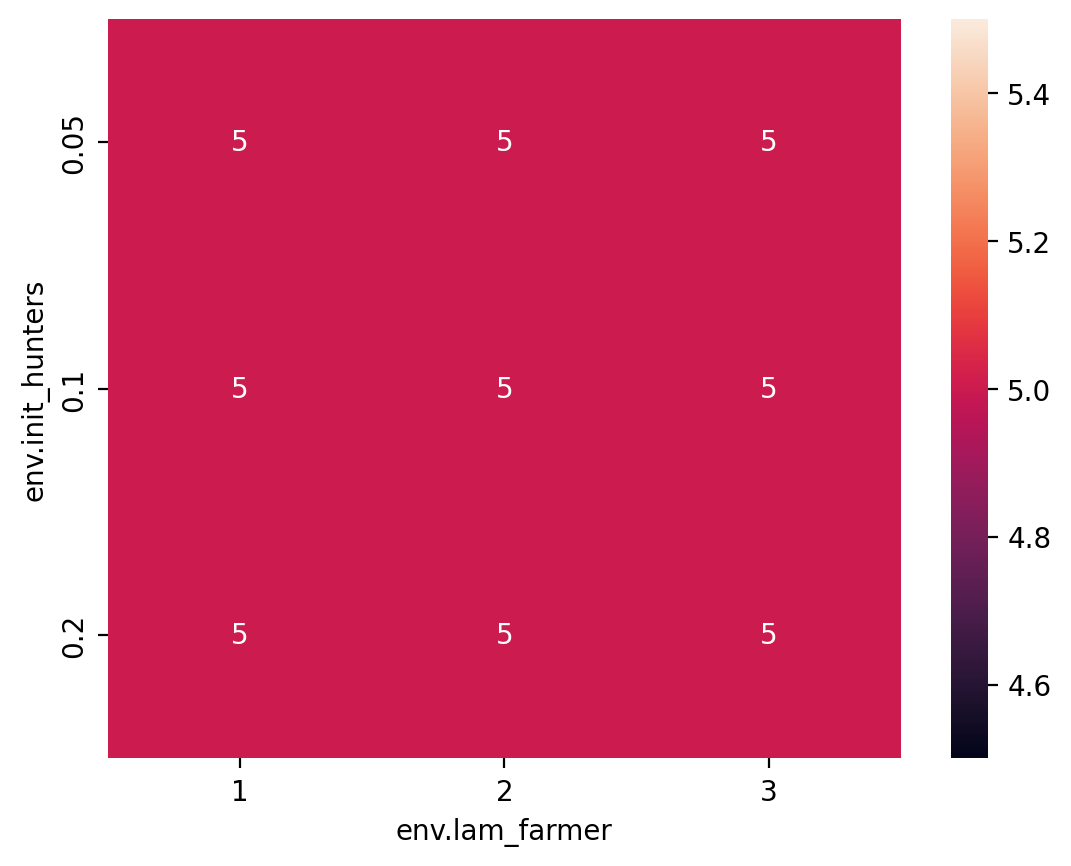

In [10]:
import pandas as pd
from pathlib import Path
import seaborn as sns

path = Path("out/south_china_evolution/2024-10-04/21-44-38")
summary = pd.read_csv(path / "summary.csv", index_col=0)
summary.head()

pivot = summary.pivot_table(
    index="env.init_hunters",
    columns="env.lam_farmer",
    values="bkp_farmer",
)
sns.heatmap(pivot, annot=True, fmt=".0f")

In [12]:
exp.num

'ABSESpyExp'